# 1. Install Dependencies and Setup

In [1]:
!pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/125.7 kB ? eta -:--:--
   ---------------------- ----------------- 71.7/125.7 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 125.7/125.7 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.0 MB 2.2 MB/s eta 0:00:18
   ---------------------------------------- 0.2/38.0 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.2/38.0 MB 1.5 MB/s eta 0:00:25
   ---------------------------------------- 0.3/38.0 MB 1.5 MB/s eta 0:00:25
   ---------------------------------------- 0.4/38.0 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.5/38.0 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.7/38.0 MB 2.0 MB/s eta 0:00:19
    --------------------------------------- 0.8/38.0 MB 2.2 MB/s eta 0:00:18
    --

# 2. Collect Images

In [3]:
import os
import time
import uuid
import cv2
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [3]:
IMAGES_PATH = 'data'
number_images = 80

In [ ]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 3. Create Dataset

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [40]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [41]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (250, 250)))
train_images = train_images.map(lambda x: x/255)

In [42]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (250, 250)))
val_images = val_images.map(lambda x: x/255)

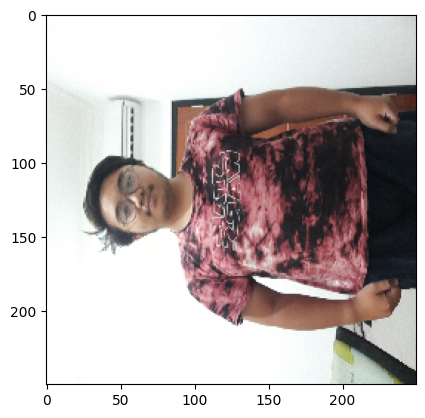

In [44]:
plt.imshow(train_images.as_numpy_iterator().next())

In [31]:
label = []

file_name = os.listdir('aug_data/train/labels/')
for file in file_name:
    with open (os.path.join('aug_data', 'train', 'labels', file), 'r', encoding = 'utf-8') as f:
        label.append(json.load(f))

In [ ]:
label

In [57]:
Keypoints = []
for i in label :
    Keypoints_x = []
    Keypoints_y = []
    for j in i['shapes']:
        Keypoints_x.append(j['points'][0][0] / 3456)
        Keypoints_y.append(j['points'][0][1] / 4608)
    
    Keypoints.append([Keypoints_x, Keypoints_y])

In [60]:
Keypoints

[0.3697916666666667,
 0.6975968567251462,
 0.902046783625731,
 0.810672514619883,
 0.3812134502923976,
 0.7101608187134503,
 0.890625,
 0.8163834064327484]

In [63]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.float16]))

In [ ]:
with open(os.path.join('aug_data', 'train', 'images', ''))

In [64]:
iterator = train_labels.as_numpy_iterator()

In [65]:
iterator.next()

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} ValueError: Attempt to convert a value ({'label': 'bahu_kiri', 'points': [[1070.1052631578946, 1704.0]], 'group_id': None, 'description': '', 'shape_type': 'point', 'flags': {}}) with an unsupported type (<class 'dict'>) to a Tensor.
Traceback (most recent call last):

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 266, in __call__
    return func(device, token, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 144, in __call__
    outputs = self._call(device, args)
              ^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 160, in _call
    outputs = [
              ^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 161, in <listcomp>
    _maybe_copy_to_context_device(self._convert(x, dtype=dtype),
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\ops\script_ops.py", line 128, in _convert
    return ops.convert_to_tensor(value, dtype=dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\profiler\trace.py", line 183, in wrapped
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\framework\ops.py", line 1443, in convert_to_tensor
    return tensor_conversion_registry.convert(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\framework\tensor_conversion_registry.py", line 234, in convert
    ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\framework\constant_op.py", line 324, in _constant_tensor_conversion_function
    return constant(v, dtype=dtype, name=name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\framework\constant_op.py", line 263, in constant
    return _constant_impl(value, dtype, shape, name, verify_shape=False,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\framework\constant_op.py", line 275, in _constant_impl
    return _constant_eager_impl(ctx, value, dtype, shape, verify_shape)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\framework\constant_op.py", line 285, in _constant_eager_impl
    t = convert_to_eager_tensor(value, ctx, dtype)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\Rafi\AppData\Roaming\Python\Python311\site-packages\tensorflow\python\framework\constant_op.py", line 98, in convert_to_eager_tensor
    return ops.EagerTensor(value, ctx.device_name, dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

ValueError: Attempt to convert a value ({'label': 'bahu_kiri', 'points': [[1070.1052631578946, 1704.0]], 'group_id': None, 'description': '', 'shape_type': 'point', 'flags': {}}) with an unsupported type (<class 'dict'>) to a Tensor.


	 [[{{node EagerPyFunc}}]] [Op:IteratorGetNext] name: 

# 4. Move Matching Labels AFTER Annotation with Labelme

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

# 5. Image Augmentation

In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                        keypoint_params=alb.KeypointParams(format='xy', label_fields=['class_labels']))

In [ ]:
for partition in ['train', 'test', 'val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        classes = [0,0]
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
    
            if label['shapes'][0]['label']=='LeftEye': 
                classes[0] = 1
                coords[0] = np.squeeze(label['shapes'][0]['points'])[0]
                coords[1] = np.squeeze(label['shapes'][0]['points'])[1]

            if label['shapes'][0]['label']=='RightEye':
                classes[1] = 1
                coords[2] = np.squeeze(label['shapes'][0]['points'])[0]
                coords[3] = np.squeeze(label['shapes'][0]['points'])[1]

            if len(label['shapes']) > 1:     
                if label['shapes'][1]['label'] =='LeftEye': 
                    classes[0] = 1 
                    coords[0] = np.squeeze(label['shapes'][1]['points'])[0]
                    coords[1] = np.squeeze(label['shapes'][1]['points'])[1]

                if label['shapes'][1]['label'] =='RightEye': 
                    classes[1] = 1
                    coords[2] = np.squeeze(label['shapes'][1]['points'])[0]
                    coords[3] = np.squeeze(label['shapes'][1]['points'])[1]
            
            np.divide(coords, [640,480,640,480])
                
        try: 
            for x in range(120):
                keypoints = [(coords[:2]), (coords[2:])]
                augmented = augmentor(image=img, keypoints=keypoints, class_labels=['LeftEye','RightEye'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image
                annotation['class'] = [0,0]
                annotation['keypoints'] = [0,0,0,0]

                if os.path.exists(label_path):
                    if len(augmented['keypoints']) > 0: 
                        for idx, cl in enumerate(augmented['class_labels']):
                            if cl == 'LeftEye': 
                                annotation['class'][0] = 1 
                                annotation['keypoints'][0] = augmented['keypoints'][idx][0]
                                annotation['keypoints'][1] = augmented['keypoints'][idx][1]
                            if cl == 'RightEye': 
                                annotation['class'][1] = 1 
                                annotation['keypoints'][2] = augmented['keypoints'][idx][0]
                                annotation['keypoints'][3] = augmented['keypoints'][idx][1]
                                
                annotation['keypoints'] = list(np.divide(annotation['keypoints'], [450,450,450,450]))


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)